In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('zomato.csv')
df.head()

User uploaded file "zomato (1).csv" with length 6464 bytes


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [16]:
#checking the shape of dataset:
df.shape

(148, 7)

In [17]:
#checking colunms:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [18]:
#checking the datatypes of colunms:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [19]:
# checking for null values:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [39]:
# data cleaning rating colunms:
def handle(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)
df['rate']=df['rate'].apply(handle)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


* **From the few checks we have done we got to know that there are 7 colunms and
148 rows, out of 7 colunms 2 are integer and other are object data type, and there are no null values in the dataset. lastly I cleaned the dataset as can be seen in thr rating colunm**

In [20]:
# lets check unique values in listed_type:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [21]:
# most voted type of returant:
top5 = (
    df.groupby('listed_in(type)')['votes']
      .sum()
      .nlargest()
)
top5


,votes
listed_in(type),
Dining,20363
other,9367
Cafes,6434
Buffet,3028


/tmp/ipython-input-3533590489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index,y=top5.values,palette='winter')


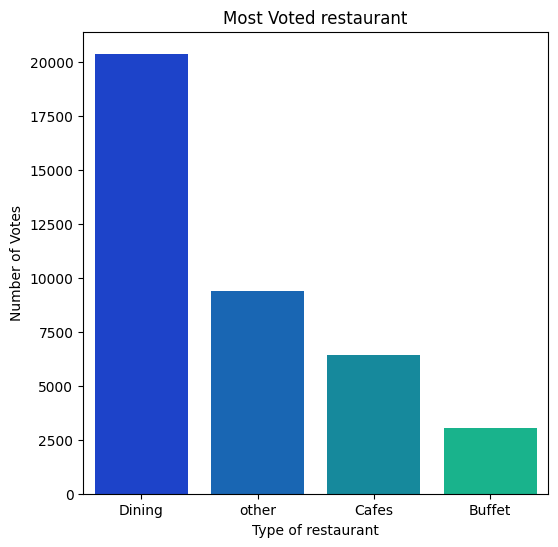

In [22]:
#lets visualize it:
plt.figure(figsize=(6,6))
sns.barplot(x=top5.index,y=top5.values,palette='winter')
plt.title('Most Voted restaurant')
plt.xlabel('Type of restaurant')
plt.ylabel('Number of Votes')
plt.show()

* **The chart clearly shows that DIning is still the most prefferd type restaurant**

In [23]:
#lets check top 5 restaurant based on votes:
top_10=df.groupby('name')['votes'].sum().nlargest(10)
top_10

,votes
name,
Onesta,5112
Empire Restaurant,4884
Meghana Foods,4401
San Churro Cafe,1836
Kabab Magic,1720
Szechuan Dragon,1647
Roving Feast,1047
Gustoes Beer House,868
Jeet Restaurant,808


/tmp/ipython-input-2662728874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index,y=top_10.values,palette='autumn')


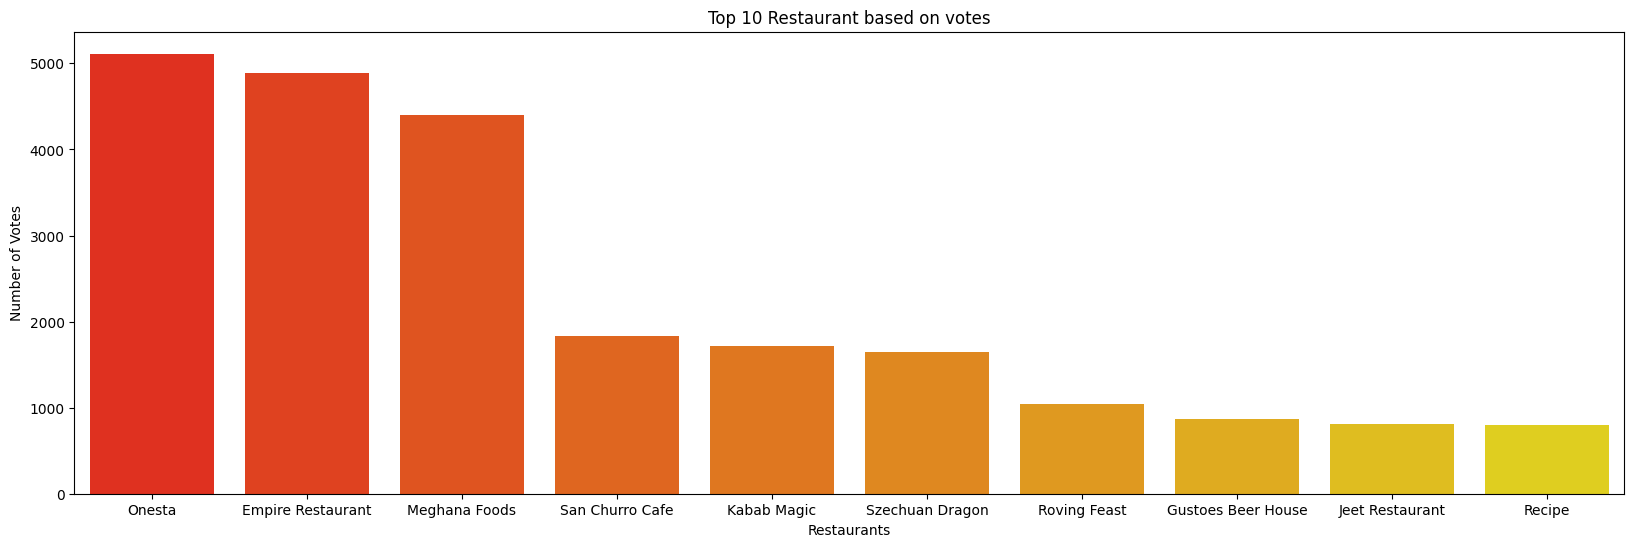

In [24]:
#lets visualize it:
plt.figure(figsize=(20,6))
plt.title('Top 10 Restaurant based on votes')
plt.xlabel('Restaurants')
plt.ylabel('Number of Votes')
sns.barplot(x=top_10.index,y=top_10.values,palette='autumn')
plt.show()

**The bar chart shows that there is high competition between onesta,empire restaurant and meghna foods for the top 3 postions**

<Axes: title={'center': 'most preferd price by couples'}, xlabel='approx_cost(for two people)', ylabel='count'>

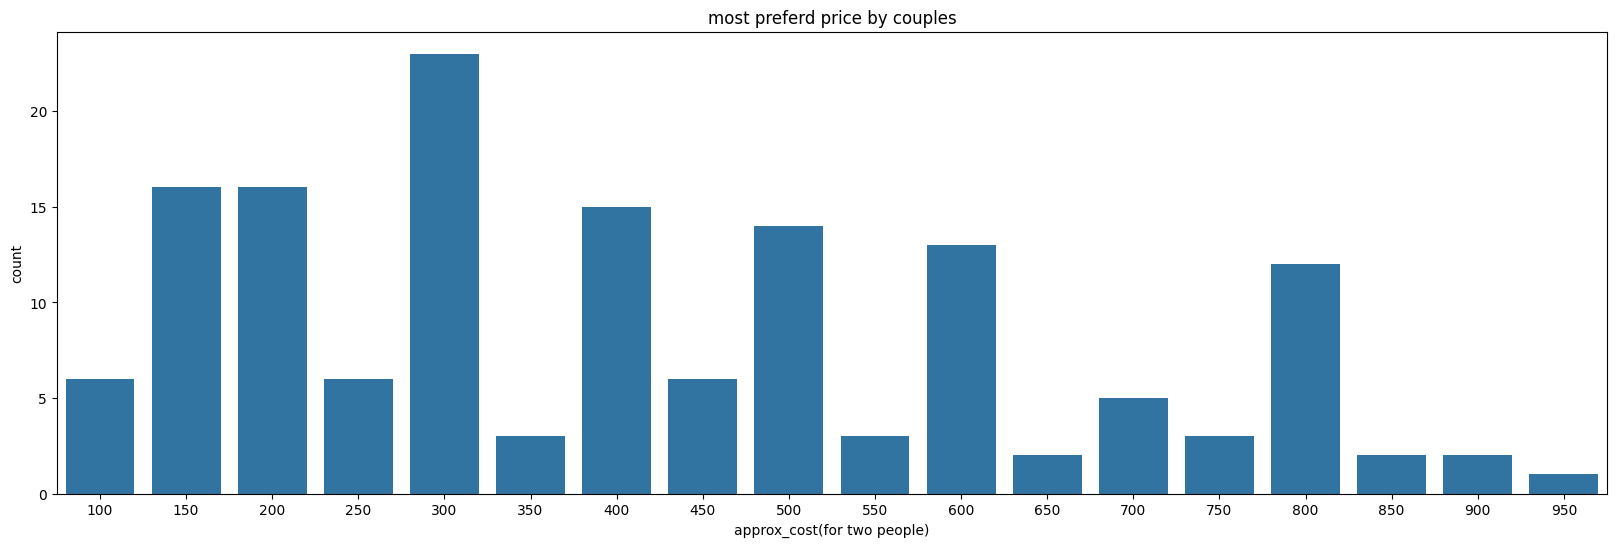

In [30]:
# what price couples are willing to pay for food:
plt.figure(figsize=(20,6))
plt.title('most preferd price by couples')
sns.countplot(x=df['approx_cost(for two people)'])

**Most couples are willing to pay 300 for food**

/tmp/ipython-input-3339855983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette='summer')


<Axes: title={'center': 'Hotels offering online order vs only offline'}, xlabel='online_order', ylabel='count'>

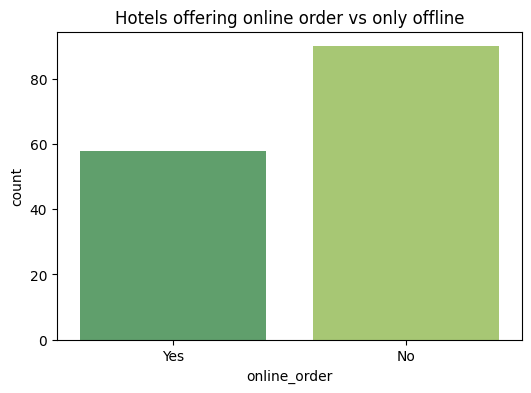

In [34]:
# lets check restaurant offering online order:
plt.figure(figsize=(6,4))
plt.title('Hotels offering online order vs only offline')
sns.countplot(x=df['online_order'],palette='summer')

**Here majority of restaurant are not offering online orders**

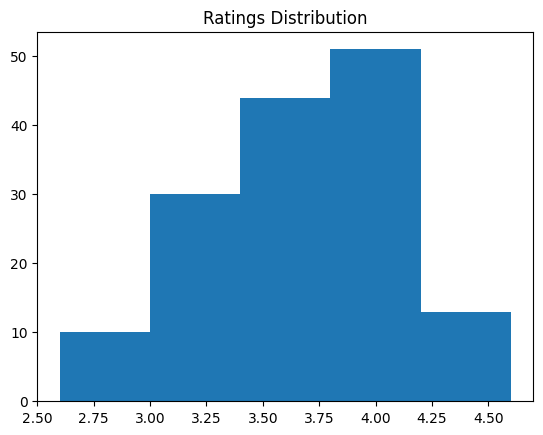

In [40]:
# checking distribution ratings:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

**Most of ratings are liying between 3.5 to 4**

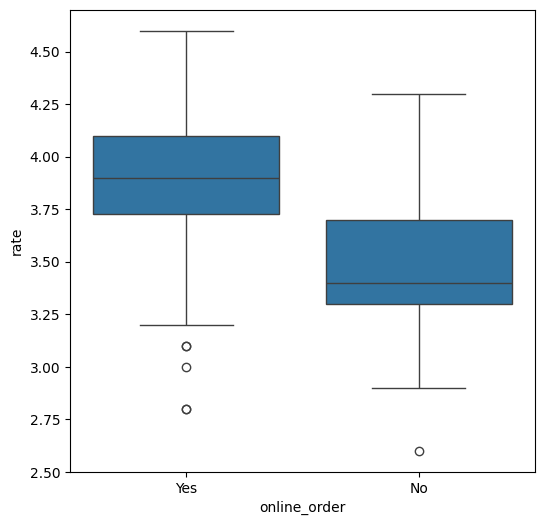

In [41]:
# comapring the restaurant ratings of restuarant accepting online order vs not :
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data = df)
plt.show()

**From the box plot it gets clear that restaurant having only offline orders are having lower ratings compared to those having online and offiline both orders**

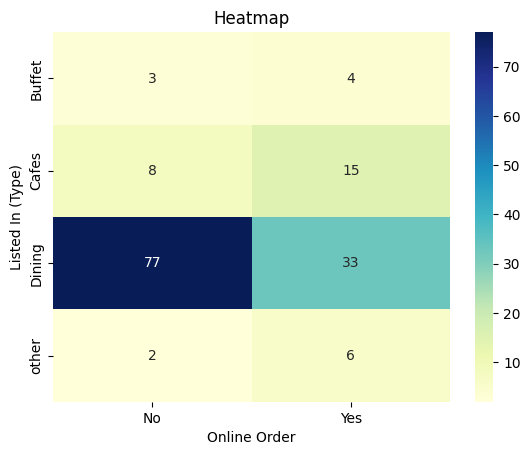

In [43]:
# checking for which type of restaurents are offering more online orders:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

**The Heat map shows that dining restaurant are hving most of there orders offline where as in cafes people are prefering ordering online**